In [1]:
pip install praw pandas nltk matplotlib wordcloud seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import praw
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer

In [3]:
nltk.download('vader_lexicon') # Downloading VADER lexicon for sentiment analysis

# Reddit API credentials
CLIENT_ID = "1vDepmXBhJKf3bNHpVnPQw"
CLIENT_SECRET = "_W0VLSendkth1WGlZH6Kva1e1_wNHA"
USER_AGENT = "Bonus/1.0 by SherM96"
reddit = praw.Reddit(client_id=CLIENT_ID,
                     client_secret=CLIENT_SECRET,
                     user_agent=USER_AGENT)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\SherM\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    return text.strip()

In [5]:
# Define subreddit and fetch posts
subreddit_name = "datascience"
subreddit = reddit.subreddit(subreddit_name)
posts = []
for post in subreddit.hot(limit=1000):  # Get top 1000 hot posts
    posts.append([post.title, post.selftext, post.score, post.num_comments, post.url])

In [6]:
df = pd.DataFrame(posts, columns=['Title', 'Text', 'Upvotes', 'Comments', 'URL'])

In [7]:
df['Title'] = df['Title'].apply(clean_text)
df['Text'] = df['Text'].apply(clean_text)

df.to_csv('reddit_data.csv', index=False)
print("Data saved to reddit_data.csv")

Data saved to reddit_data.csv


In [8]:
df.head(10)

,Title,Text,Upvotes,Comments,URL
0,weekly entering transitioning thread 03 feb ...,welcome to this weeks entering transitioning ...,7,21,https://www.reddit.com/r/datascience/comments/...
1,weekly entering transitioning thread 20 jan ...,welcome to this weeks entering transitioning ...,11,36,https://www.reddit.com/r/datascience/comments/...
2,for a takehome performance project thats meant...,ive completed a take home project for an analy...,81,64,https://www.reddit.com/r/datascience/comments/...
3,side projects,what are your side projects for me i have a be...,54,45,https://www.reddit.com/r/datascience/comments/...
4,xi correlation coefficient in postgres,,1,0,https://github.com/Florents-Tselai/pgxicor
5,ml system design mock,i have ml system design interview coming up an...,6,0,https://www.reddit.com/r/datascience/comments/...
6,guidance for new professionals,hey everyone i worked at this company last sum...,34,9,https://www.reddit.com/r/datascience/comments/...
7,how to prepare for interviews with an analystf...,edited from op to avoid the confusion hi every...,41,10,https://www.reddit.com/r/datascience/comments/...
8,what areas does synthetic data generation has ...,there are synthetic data generation libraries ...,77,46,https://www.reddit.com/r/datascience/comments/...
9,tabpfn v2 a pretrained transformer outperforms...,have any of you tried tabpfn v2 it is a pretra...,18,5,https://www.reddit.com/r/datascience/comments/...


# DATA ANALYSIS

In [10]:
# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Sentiment Analysis
df['Sentiment'] = df['Title'].apply(lambda text: sia.polarity_scores(text)['compound'])

# Categorize sentiment
df['Sentiment_Label'] = df['Sentiment'].apply(lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral'))

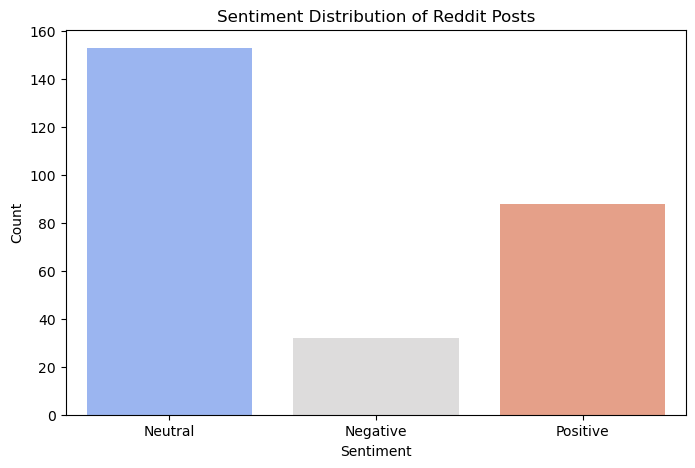

In [11]:
# Plot Sentiment Distribution
plt.figure(figsize=(8,5))
sns.countplot(x=df['Sentiment_Label'], palette='coolwarm')
plt.title("Sentiment Distribution of Reddit Posts")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [12]:
# Word Frequency Analysis
all_words = " ".join(df['Title'])
word_list = all_words.split()
word_counts = Counter(word_list)

In [13]:
common_words = word_counts.most_common(30)
words, counts = zip(*common_words)

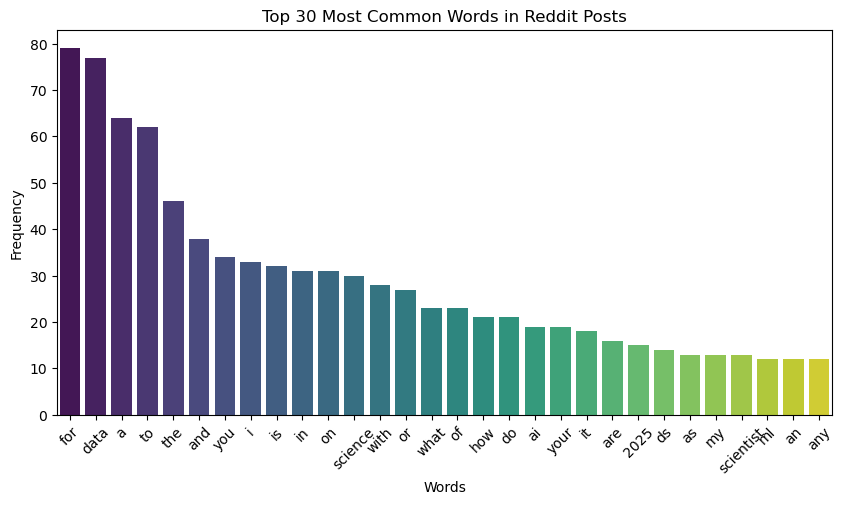

In [14]:
plt.figure(figsize=(10,5))
sns.barplot(x=list(words), y=list(counts), palette='viridis')
plt.title("Top 30 Most Common Words in Reddit Posts")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

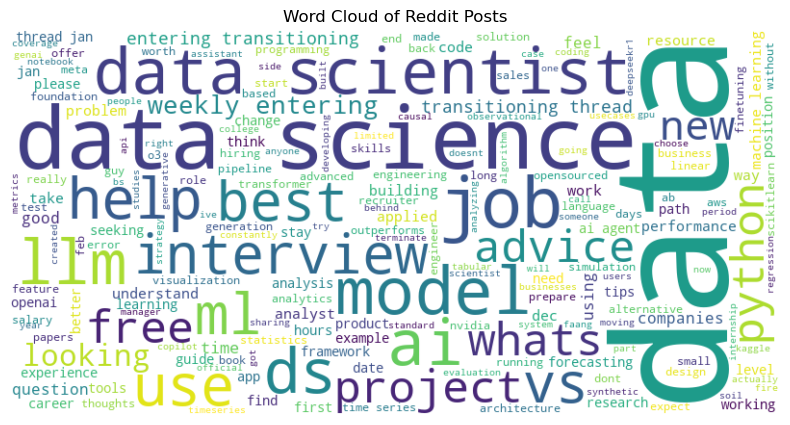

In [15]:
# Word Cloud Visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Reddit Posts")
plt.show()